In [114]:
import pandas, matplotlib.pyplot as plt, numpy, string
# %matplotlib notebook

In [115]:
xlsx = pandas.ExcelFile("data/SAM-1242 (UP, XPS) Raw Data.xlsx")
sheets = xlsx.sheet_names
sheets

['Wo - Na1s Scan C',
 'Wo - O1s Scan C',
 'Wo - N1s Scan C',
 'Wo - C1s Scan C',
 'Wo - S2p Scan C',
 'Wo - P2p Scan C',
 'Wo - Si2p Scan C',
 'Wo - Valence C',
 'Peak Table C',
 'Titles C',
 'Wo - Survey B',
 'Peak Table B',
 'Titles B',
 'Pb - O1s Scan A',
 'Pb - N1s Scan A',
 'Pb - C1s Scan A',
 'Pb - Pb4f Scan A',
 'Pb - Si2p Scan A',
 'Pb - Valence A',
 'Peak Table A',
 'Titles A',
 'Pb - Survey',
 'Peak Table',
 'Titles',
 'Sheet1']

In [136]:
skiprows_list = list(range(14))
skiprows_list.append(15)
skiprows_list

c_Wo = 'darkorange'
c_Pb = 'darkgrey'
surveys = [ 'Wo - Survey B', 'Pb - Survey'] 
labels = ['consortium', 'Pb loaded consortium']
colors = [c_Wo, c_Pb]

surveys_colors = dict(zip(surveys, colors))
surveys_labels = dict(zip(surveys, labels))

def survey_plotter(ax, sheet_list, labels, xlim_tuple, texts, lines):
    shift = 0
    for text in texts:
        ax.text(text[0], text[1], text[2])
    for line in lines:
        ax.plot(line[0], line[1], color='grey', linewidth=0.7)

    for sheet in sheet_list:
        df = xlsx.parse(sheet, skiprows=lambda x: x in skiprows_list)
        x = df['Binding Energy (E)']
        y = df['Unnamed: 2'].values + shift
        ax.plot(x, y, color=surveys_colors[sheet], label=surveys_labels[sheet])
#         ax.text(1300, y[0] + 0.2e4, surveys_letters[sheet], fontsize=12)
        shift -= 2.5e4
    ax.text(1300, 8.5e4, 'a)', fontsize=12, fontweight='bold')
    ax.set_ylabel('intensity (CPS)')
    ax.set_xlabel('Binding Energy (eV)')
    ax.set_xlim(xlim_tuple)
    ax.axes.yaxis.set_ticks([])    
    ax.legend(ncol=4, bbox_to_anchor=(-0.1, 1.2), loc='upper left')
        
texts = [
         [531.6 - 20, 7.5e4, 'O1s'],
#          [500, 0.4e4, 'Pb4d'],
         [399.7 + 40, 5e4, 'N1s'],
         [287.1 - 20, 5.5e4, 'C1s'],
         [139.5 + 50, -1.4e4, 'Pb4f'],
         [109, 8000, 'Si2p'],
         [1071 + 50, 6.8e4, 'Na1s']
        ]

lines = [
#          [[910, 1022.3], [-0.75e4, -0]],
#          [[910, 1022.3], [-0.75e4, -2.3e4]],
#          [[347.1, 347.1], [4.2e4, 2e4]],
#          [[139.5 - 45, 139.5], [-3.3e4,-0.5e4]],
#          [[139.5 - 45, 139.5], [-3.3e4,-5.5e4]]
        ]


class Graph(object):
    
    def __init__(self, sheets, labels, colors_list, ys):
        self.sheets = sheets
        self.labels = labels
        self.colors_list = colors_list
        self.ys = ys
        
        self.sheets_colors = dict(zip(sheets, colors_list))
        skiprows_list = list(range(14))
        skiprows_list.append(15)
        self.df_list = [xlsx.parse(sheet, skiprows=lambda x: x in skiprows_list) for sheet in sheets]
        self.sheets_dfs = dict(zip(sheets, self.df_list))
        
    def plot(self, ax, xlims, ylims, yshift, vline_lims=None, vline_xs=None, vline_label_xshift=None, vline_label_y=None, vline_labels=None, subplot_letter=None, subplot_loc=None):
        i = 0 # counter multiplied by yshift to help space the graph
        ax.text(subplot_loc[0], subplot_loc[1], subplot_letter, fontsize=12, fontweight='bold')
        for sheet in self.sheets:
            df = self.sheets_dfs[sheet]
            df_headings = list(df)
            xs = df['Binding Energy (E)'].values
            ax.set_xlim(xlims)
            ax.set_ylim(ylims)
            ax.set_xlabel('Binding energy (eV)')
            ax.set_ylabel('intensity (CPS)')
            
            for ys in self.ys:
                if ys in df_headings: # This section adds a column of ys if the y doesn't exist in the df
                    pass
                else:
                    df[ys] = [numpy.nan]*len(df)
                y = df[ys].values + yshift*i
                ax.plot(xs, y, color=self.sheets_colors[sheet])
            i += 1
            
            if vline_xs != None:
                vline_xslabels = dict(zip(vline_xs, vline_labels))
                vline_color='black'
                for vline_x in vline_xs:
                    ax.vlines(vline_x, vline_lims[0], vline_lims[1], linewidth=0.5, linestyle='--', color=vline_color)
                    ax.text(vline_x + vline_label_xshift, vline_label_y, vline_xslabels[vline_x], rotation=90, color=vline_color)
            ax.axes.yaxis.set_ticks([])
        
Pb4f = Graph(sheets=['Pb - Pb4f Scan A'],
             labels=['Pb loaded consortium'],
             colors_list=[c_Pb],
             ys=['Unnamed: 2'])

# Zn2p = Graph(sheets=['AC No Pb - Zn2p Scan G', 'AC Pb - Zn2p Scan B'],
#              labels = ['ZnCl$_2$ activated WAS', 'Pb adsorbed ZnCl$_2$ activated WAS'],
#              colors_list=[c_AC, c_AC_Pb],
#              ys=['Unnamed: 2'])

C1s = Graph(sheets=['Wo - C1s Scan C',  'Pb - C1s Scan A'],
            labels=['consortium', 'Pb loaded consortium'],
            colors_list=[c_Wo, c_Pb],
            ys=['C1s (C-C) sp2', 'C1s (C-O)', 'C1s (C=O)', 'C1s (O-C=O)', 'C1s (C-C) sp3'])

O1s = Graph(sheets=['Wo - O1s Scan C', 'Pb - O1s Scan A'],
            labels=['consortium', 'Pb loaded consortium'],
            colors_list=[c_Wo, c_Pb],
            ys=['O1s (Metal Oxides)', 'O1s (Organic C-O)', 'O1s (Organic C=O)'])

N1s = Graph(sheets=['Wo - N1s Scan C', 'Pb - N1s Scan A'],
            labels=['consortium', 'Pb loaded consortium'],
            colors_list=[c_Wo, c_Pb],
            ys=['Unnamed: 2'])

# S12p = Graph(sheets=['UN No Pb - Si2p Scan D',  'UN Pb - Si2p Scan F',   'AC No Pb - Si2p Scan G', 'AC Pb - Si2p Scan B'],
#             labels=['Raw WAS', 'Pb adsorbed raw WAS', 'ZnCl$_2$ activated WAS', 'Pb adsorbed ZnCl$_2$ activated WAS'],
#             colors_list=[c_UN, c_UN_Pb, c_AC, c_AC_Pb],
#             ys=['Unnamed: 2'])



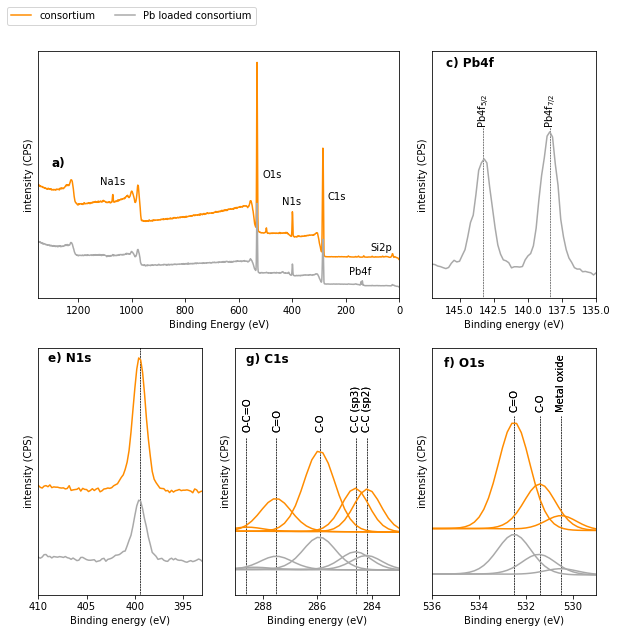

In [137]:
fig = plt.figure(0)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = plt.subplot2grid((2,3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2,3), (0, 2))
ax3 = plt.subplot2grid((2,3), (1, 0))
ax4 = plt.subplot2grid((2,3), (1, 1))
ax5 = plt.subplot2grid((2,3), (1, 2))

survey_plotter(ax=ax1, sheet_list=surveys, labels=surveys, xlim_tuple=(1350,0), texts=texts, lines=lines)

Pb4f.plot(ax=ax2,
          xlims=(147, 135),
          ylims=(0, 1200),
          yshift=-1000,
          vline_lims=[-750, 830],
          vline_xs=[138.4, 143.3],
          vline_label_y=850,
          vline_label_xshift=0.45,
          vline_labels=['Pb4f$_{7/2}$', 'Pb4f$_{5/2}$'],
          subplot_loc=[146, 1125],
          subplot_letter='c) Pb4f')

# S12p.plot(ax=ax3,
#          xlims=(110, 95),
#          ylims=(-900, 1000),
#          yshift=-300,
#          vline_lims=[-1400, 850],
#          vline_xs=[102.2],
#          vline_label_y=4100,
#          vline_label_xshift=0.45,
#          vline_labels=[''],
#          subplot_loc=[109, 900],
#          subplot_letter='d) Si2p')

# Zn2p.plot(ax=ax2, 
#           xlims=(1050, 1015),
#           ylims=(2750, 8000),
#           yshift=-1000,
#           vline_lims=[2000, 6500],
#           vline_xs=[1045.2, 1022.5],
#           vline_label_y=6700,
#           vline_label_xshift=0.5,
#           vline_labels=['Zn2p$_{1/2}$', 'Zn2p$_{3/2}$'],
#           subplot_loc=[1048, 7700],
#           subplot_letter='b) Zn2p')

N1s.plot(ax=ax3,
         xlims=(410, 393),
         ylims=(-1e3, 6e3),
         yshift=-1e3,
         vline_lims=[-4624, 7e3],
         vline_xs=[399.5],
         vline_label_xshift=0.08,
         vline_label_y=7e3,
         vline_labels=[''],
         subplot_loc=[409, 5.6e3],
         subplot_letter='e) N1s')

C1s.plot(ax=ax4, 
         xlims=(289,283),
         ylims=(-0.8e4, 2.5e4),
         yshift=-5000,
         vline_lims=[1.3e4, -30e3],
         vline_xs=[284.2, 284.6, 285.9, 287.5, 288.6],
         vline_label_y=1.4e4,
         vline_label_xshift=0.15,
         vline_labels=['C-C (sp2)', 'C-C (sp3)', 'C-O', 'C=O', 'O-C=O'],
         subplot_loc=[288.6, 2.3e4],
         subplot_letter='g) C1s')

O1s.plot(ax=ax5,
         xlims=(536, 529),
         ylims=(-0.8e4, 8e3*4),
         yshift=-6e3,
         vline_lims=[-3.5e4, 2.1e4],
         vline_xs=[530.5, 531.4, 532.5],
         vline_label_xshift=0.2,
         vline_label_y=2.2e4,
         vline_labels=['Metal oxide', 'C-O', 'C=O'],
         subplot_loc=[535.5, 2.9e4],
         subplot_letter='f) O1s')

plt.draw()
plt.show()
fig.savefig('bact-XPS.png', bbox_inches='tight', dpi=600)